In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [43]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [44]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df.size

32970000

In [46]:
df.shape

(42000, 785)

In [47]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9479,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
import matplotlib.pyplot as plt

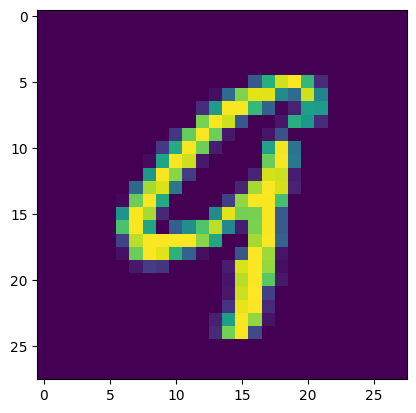

In [49]:
plt.imshow(df.iloc[9551,1:].values.reshape(28,28))

In [50]:
# Predicting the value without using PCA(Principle Component Analysis)

X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [53]:
X_train.shape

(33600, 784)

In [54]:
print(X_train.isnull().sum()) 
# No missing Value
print(X_test.isnull().sum())

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [58]:
# As we have not done Feature Extraction from the data using Principal Component Analysis this process will take lot's of time to get train and predict the result
import time
start = time.time()
Y_pred = knn.predict(X_test)
print(time.time() - start)

12.217168092727661


In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9648809523809524

In [60]:
#  NOW LET'S APPLY PCA BEFORE PERFORMING ANY MACHINE LEARNING ALGORITHM ON THE DATA
# Step 1 Mean centring
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# Step 2 : Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=300)

In [71]:
# Finding Egien Vector and Value
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [72]:
X_train.shape

(33600, 784)

In [73]:
X_train_trf.shape

(33600, 300)

In [74]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf,Y_train)

KNeighborsClassifier()

In [75]:
y_pred_trf = knn.predict(X_test_trf)

In [76]:
accuracy_score(Y_test,y_pred_trf)

0.9476190476190476

In [ ]:
# Now to find how many PCA we will need to get best result i will run the loop for 785 times